In [1]:
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go
import talib as ta

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("Initial_cleaned_data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40365 entries, 0 to 40364
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      40365 non-null  object 
 1   Symbol    40365 non-null  object 
 2   LTP       40365 non-null  float64
 3   %Change   40365 non-null  float64
 4   High      40365 non-null  float64
 5   Low       40365 non-null  float64
 6   Open      40365 non-null  float64
 7   Quantity  40348 non-null  float64
 8   Turnover  40365 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.8+ MB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40365 entries, 0 to 40364
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      40365 non-null  datetime64[ns]
 1   Symbol    40365 non-null  object        
 2   LTP       40365 non-null  float64       
 3   %Change   40365 non-null  float64       
 4   High      40365 non-null  float64       
 5   Low       40365 non-null  float64       
 6   Open      40365 non-null  float64       
 7   Quantity  40348 non-null  float64       
 8   Turnover  40365 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 2.8+ MB


In [7]:
stock = 'SBL'
start = '2019-04-01'
end = '2019-05-23'

In [8]:
req_stock_df = df[ (df['Date']>start) & (df['Date']< end) & (df['Symbol']==stock)]

In [9]:
req_stock_df

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover
19374,2019-04-10,SBL,311.0,0.32,316.0,306.0,306.0,17889.0,5587118.0
19543,2019-04-11,SBL,314.0,0.96,317.0,310.0,317.0,23461.0,7371098.0
19709,2019-04-15,SBL,317.0,0.96,318.0,315.0,316.0,16393.0,5186865.0
19876,2019-04-16,SBL,333.0,5.05,333.0,316.0,319.0,48241.0,15720247.0
20036,2019-04-17,SBL,345.0,3.60,345.0,327.0,333.0,88521.0,29936219.0
20196,2019-04-18,SBL,353.0,2.32,354.0,340.0,345.0,67699.0,23592943.0
20362,2019-04-02,SBL,300.0,2.39,302.0,294.0,294.0,26432.0,7918167.0
20533,2019-04-21,SBL,357.0,1.13,357.0,345.0,353.0,67323.0,23635401.0
20698,2019-04-22,SBL,347.0,-2.80,361.0,343.0,361.0,58726.0,20593932.0
20871,2019-04-23,SBL,344.0,-0.86,351.0,342.0,345.0,20355.0,7031092.0


In [10]:
req_stock_df = req_stock_df.sort_values('Date')


In [11]:
req_stock_df['Average_price'] =pd.Series(req_stock_df['Turnover']/req_stock_df['Quantity']).round(2)

In [12]:
req_stock_df

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover,Average_price
20362,2019-04-02,SBL,300.0,2.39,302.0,294.0,294.0,26432.0,7918167.0,299.57
21730,2019-04-03,SBL,302.0,0.67,306.0,300.0,306.0,50475.0,15330040.0,303.72
22075,2019-04-04,SBL,304.0,0.66,307.0,301.0,302.0,26867.0,8190975.0,304.87
22243,2019-04-07,SBL,316.0,3.95,316.0,302.0,303.0,42912.0,13288129.0,309.66
22401,2019-04-08,SBL,312.0,-1.27,321.0,311.0,316.0,39598.0,12539202.0,316.66
22565,2019-04-09,SBL,310.0,-0.64,316.0,310.0,314.0,37758.0,11787392.0,312.18
19374,2019-04-10,SBL,311.0,0.32,316.0,306.0,306.0,17889.0,5587118.0,312.32
19543,2019-04-11,SBL,314.0,0.96,317.0,310.0,317.0,23461.0,7371098.0,314.19
19709,2019-04-15,SBL,317.0,0.96,318.0,315.0,316.0,16393.0,5186865.0,316.41
19876,2019-04-16,SBL,333.0,5.05,333.0,316.0,319.0,48241.0,15720247.0,325.87


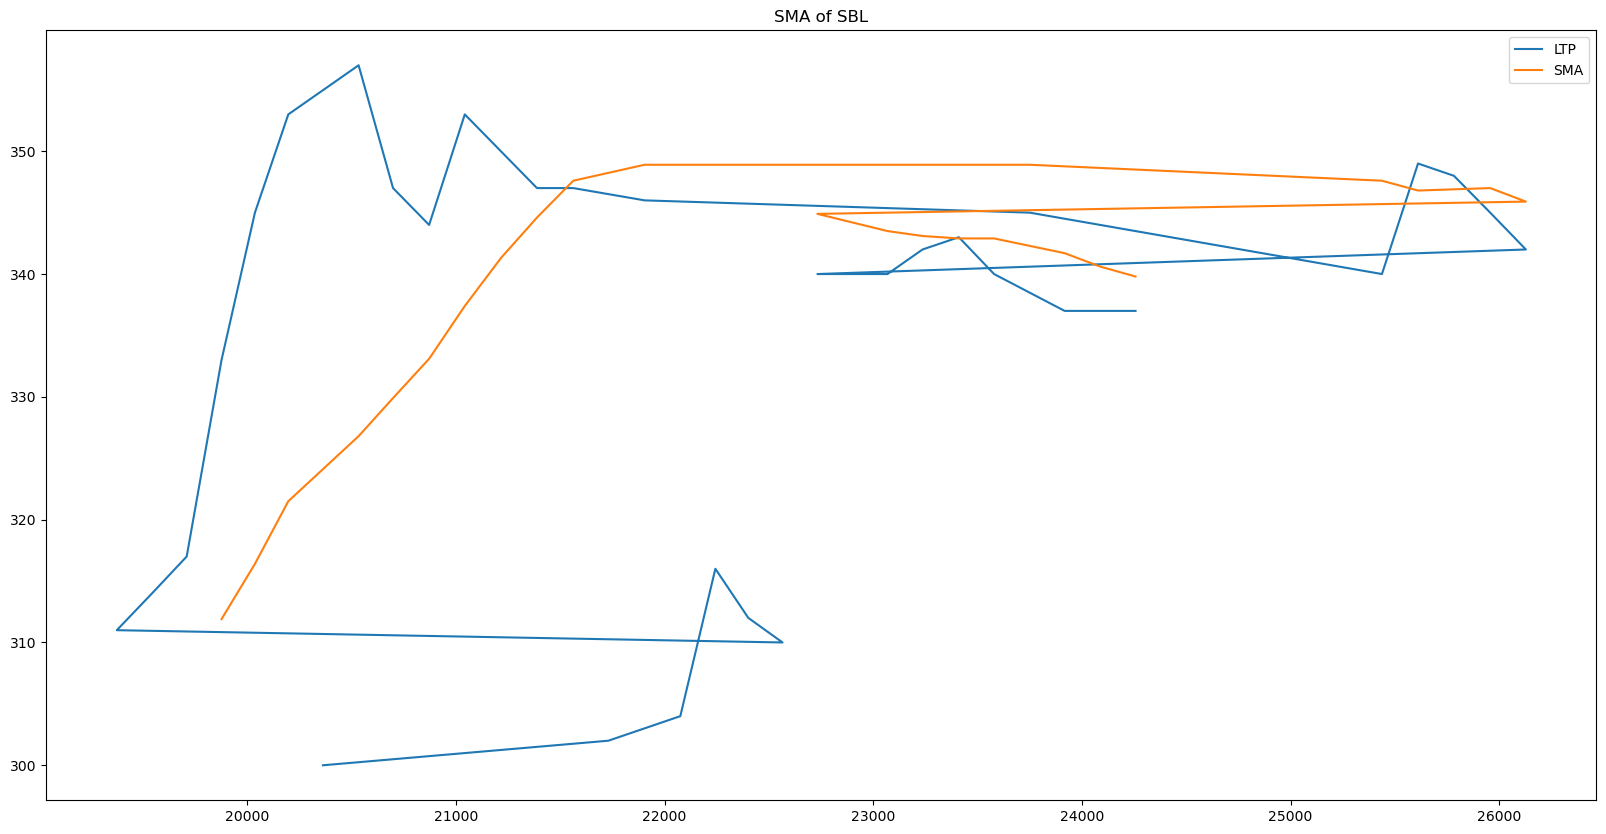

In [13]:
req_stock_df['SMA'] = ta.SMA(req_stock_df['LTP'],timeperiod=10)
req_stock_df[['LTP','SMA']].plot(figsize=(20,10))
plt.title(f"SMA of {stock}")
plt.show()

In [14]:
req_stock_df

,Date,Symbol,LTP,%Change,High,Low,Open,Quantity,Turnover,Average_price,SMA
20362,2019-04-02,SBL,300.0,2.39,302.0,294.0,294.0,26432.0,7918167.0,299.57,NaN
21730,2019-04-03,SBL,302.0,0.67,306.0,300.0,306.0,50475.0,15330040.0,303.72,NaN
22075,2019-04-04,SBL,304.0,0.66,307.0,301.0,302.0,26867.0,8190975.0,304.87,NaN
22243,2019-04-07,SBL,316.0,3.95,316.0,302.0,303.0,42912.0,13288129.0,309.66,NaN
22401,2019-04-08,SBL,312.0,-1.27,321.0,311.0,316.0,39598.0,12539202.0,316.66,NaN
22565,2019-04-09,SBL,310.0,-0.64,316.0,310.0,314.0,37758.0,11787392.0,312.18,NaN
19374,2019-04-10,SBL,311.0,0.32,316.0,306.0,306.0,17889.0,5587118.0,312.32,NaN
19543,2019-04-11,SBL,314.0,0.96,317.0,310.0,317.0,23461.0,7371098.0,314.19,NaN
19709,2019-04-15,SBL,317.0,0.96,318.0,315.0,316.0,16393.0,5186865.0,316.41,NaN
19876,2019-04-16,SBL,333.0,5.05,333.0,316.0,319.0,48241.0,15720247.0,325.87,311.9


In [15]:
trace1 = go.Scatter(x=req_stock_df['Date'], y=req_stock_df['LTP'], mode='lines', name='LTP')
trace2 = go.Scatter(x=req_stock_df['Date'], y=req_stock_df['SMA'], mode='lines', name='SMA')

In [16]:
layout = go.Layout(title='Line Plots', xaxis=dict(title='Date'), yaxis=dict(title='prices'))


In [17]:
fig = go.Figure(data=[trace1, trace2], layout=layout)


In [18]:
fig.show()

In [19]:
req_stock_df['up_band'], req_stock_df['mid_band'], req_stock_df['low_band'] = ta.BBANDS(req_stock_df['LTP'], timeperiod =5)



In [20]:

trace3 = go.Scatter(x=req_stock_df['Date'], y=req_stock_df['up_band'], mode='lines', name='up band')
trace4 = go.Scatter(x=req_stock_df['Date'], y=req_stock_df['mid_band'], mode='lines', name='mid band',fill='tonextx',fillcolor='rgba(255,0,0,0.2)')
trace5 = go.Scatter(x=req_stock_df['Date'], y=req_stock_df['low_band'], mode='lines', name='low band',fill='tonextx',fillcolor='rgba(255,0,0,0.2)')
trace6 = go.Scatter(x= req_stock_df['Date'],y = req_stock_df['Average_price'],mode = 'lines', name = 'Average Price')

In [21]:
layout1 = go.Layout(title=f'Line plots of {stock}',xaxis=dict(title = 'Date'),yaxis=dict(title = 'Prices'))
fig= go.Figure(data=[trace3,trace4,trace5,trace6],layout = layout1)
fig.show()